What are interesting exoplanets?
* https://www.wikiwand.com/en/List_of_exoplanet_extremes
 - are any of these planets observed with TESS?

In [1]:
import pandas as pd

tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_exoplanet_extremes')
len(tables)

7

In [2]:
headers = ["Extremes from Earth's viewpoint",
           "Planetary characteristics",
           "Orbital characteristics",
           "Stellar characteristics",
           "System characteristics", #
           "External links",
           "See also"]

In [3]:
from tqdm import tqdm
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## short cadence

Searching targetpixelfile using Tesscut
Applying data quality mask identified in Data Release Notes (sector 6):
t>1468.26998

aperture photometry mask: square (1x1 pix)

Brightest star detected is near the edges.
Aperture mask is placed at the center instead.



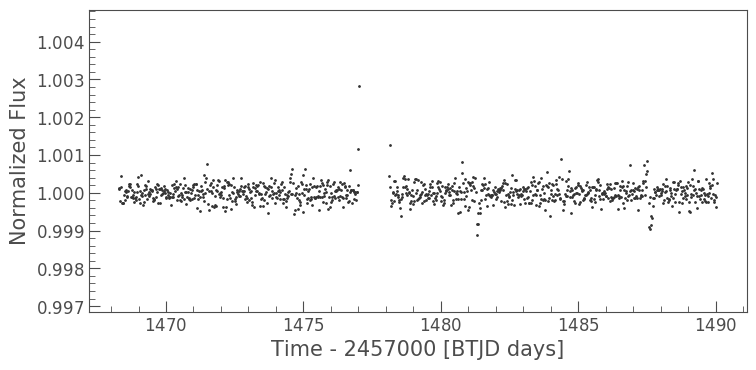

In [23]:
# l = cr.LongCadence(ticid=42884378)
lc = l.make_custom_lc(sap_mask='square', aper_radius=1, 
                      #sap_mask='threshold', threshold_sigma=5
                     )
lc.flatten(window_length=31).scatter()

In [13]:
lcs = {}
rvs = {}
for i in tqdm(range(4)):
    table = tables[i]
    names = tables[3]['Star']
    for name in names:
        try:
            l = cr.ShortCadence(name=name, verbose=False, )    
            d = l.query_gaia_dr2_catalog(return_nearest_xmatch=True, radius=5)
            lc = l.get_lc(lctype='pdcsap')
            lcs[name] = lc
            rvs[name] = cr.check_harps_RV(l.target_coord, verbose=False)
        except Exception as e:
            print(e)

  0%|          | 0/4 [00:00<?, ?it/s]

list index out of range
Available sectors: [4, 5, 6]
Using sector=4.
use radius>5.0 arcsec
Available sectors: [18]
Using sector=18.
use radius>5.0 arcsec
Unable to find coordinates for name '2MASS J1119–1137'
Unable to find coordinates for name 'VHS 1256-1257'
Unable to find coordinates for name '2M J044144[35]'
list index out of range
list index out of range
Unable to find coordinates for name '2M 0746+20'
list index out of range
list index out of range
Unable to find coordinates for name 'NY Virginis[42]'
Unable to find coordinates for name 'Fomalhaut[43]'


 25%|██▌       | 1/4 [00:07<00:21,  7.25s/it]

list index out of range
list index out of range
Available sectors: [4, 5, 6]
Using sector=4.
use radius>5.0 arcsec
Available sectors: [18]
Using sector=18.
use radius>5.0 arcsec
Unable to find coordinates for name '2MASS J1119–1137'
Unable to find coordinates for name 'VHS 1256-1257'
Unable to find coordinates for name '2M J044144[35]'
list index out of range
list index out of range
Unable to find coordinates for name '2M 0746+20'
list index out of range
list index out of range
Unable to find coordinates for name 'NY Virginis[42]'
Unable to find coordinates for name 'Fomalhaut[43]'


 50%|█████     | 2/4 [00:14<00:14,  7.27s/it]

list index out of range
list index out of range
Available sectors: [4, 5, 6]
Using sector=4.
use radius>5.0 arcsec
Available sectors: [18]
Using sector=18.
use radius>5.0 arcsec
Unable to find coordinates for name '2MASS J1119–1137'
Unable to find coordinates for name 'VHS 1256-1257'
Unable to find coordinates for name '2M J044144[35]'
list index out of range
list index out of range
Unable to find coordinates for name '2M 0746+20'
list index out of range
list index out of range
Unable to find coordinates for name 'NY Virginis[42]'
Unable to find coordinates for name 'Fomalhaut[43]'


 75%|███████▌  | 3/4 [00:21<00:07,  7.25s/it]

list index out of range
list index out of range
Available sectors: [4, 5, 6]
Using sector=4.
use radius>5.0 arcsec
Available sectors: [18]
Using sector=18.
use radius>5.0 arcsec
Unable to find coordinates for name '2MASS J1119–1137'
Unable to find coordinates for name 'VHS 1256-1257'
Unable to find coordinates for name '2M J044144[35]'
list index out of range
list index out of range
Unable to find coordinates for name '2M 0746+20'
list index out of range
list index out of range
Unable to find coordinates for name 'NY Virginis[42]'
Unable to find coordinates for name 'Fomalhaut[43]'


100%|██████████| 4/4 [00:28<00:00,  7.24s/it]

list index out of range


## long cadence

In [8]:
lcs = {}
rvs = {}
for i in tqdm(range(4)):
    table = tables[i]
    names = tables[3]['Star']
    for name in names:
        try:
            l = cr.LongCadence(name=name, verbose=False)    
            d = l.query_gaia_dr2_catalog(return_nearest_xmatch=True)
            lc = l.make_custom_lc()
            lcs[name] = lc
            rvs[name] = cr.check_harps_RV(l.target_coord, verbose=False)
        except Exception as e:
            print(e)

  0%|          | 0/4 [00:00<?, ?it/s]

list index out of range
Available sectors: [4, 5, 6]
Using sector=4.
use radius>3.0 arcsec
Available sectors: [18]
Using sector=18.
use radius>3.0 arcsec
Unable to find coordinates for name '2MASS J1119–1137'
Unable to find coordinates for name 'VHS 1256-1257'
Unable to find coordinates for name '2M J044144[35]'
list index out of range
list index out of range
Unable to find coordinates for name '2M 0746+20'
list index out of range
list index out of range
Unable to find coordinates for name 'NY Virginis[42]'
Unable to find coordinates for name 'Fomalhaut[43]'


 25%|██▌       | 1/4 [00:07<00:21,  7.10s/it]

list index out of range
list index out of range
Available sectors: [4, 5, 6]
Using sector=4.
use radius>3.0 arcsec
Available sectors: [18]
Using sector=18.
use radius>3.0 arcsec
Unable to find coordinates for name '2MASS J1119–1137'
Unable to find coordinates for name 'VHS 1256-1257'
Unable to find coordinates for name '2M J044144[35]'
list index out of range
list index out of range
Unable to find coordinates for name '2M 0746+20'
list index out of range
list index out of range
Unable to find coordinates for name 'NY Virginis[42]'
Unable to find coordinates for name 'Fomalhaut[43]'


 50%|█████     | 2/4 [00:14<00:14,  7.15s/it]

list index out of range
list index out of range
Available sectors: [4, 5, 6]
Using sector=4.
use radius>3.0 arcsec
Available sectors: [18]
Using sector=18.
use radius>3.0 arcsec
Unable to find coordinates for name '2MASS J1119–1137'
Unable to find coordinates for name 'VHS 1256-1257'
Unable to find coordinates for name '2M J044144[35]'
list index out of range
list index out of range
Unable to find coordinates for name '2M 0746+20'
list index out of range
list index out of range
Unable to find coordinates for name 'NY Virginis[42]'
Unable to find coordinates for name 'Fomalhaut[43]'


 75%|███████▌  | 3/4 [00:21<00:07,  7.23s/it]

list index out of range
list index out of range
Available sectors: [4, 5, 6]
Using sector=4.
use radius>3.0 arcsec
Available sectors: [18]
Using sector=18.
use radius>3.0 arcsec
Unable to find coordinates for name '2MASS J1119–1137'
Unable to find coordinates for name 'VHS 1256-1257'
Unable to find coordinates for name '2M J044144[35]'
list index out of range
list index out of range
Unable to find coordinates for name '2M 0746+20'
list index out of range
list index out of range
Unable to find coordinates for name 'NY Virginis[42]'
Unable to find coordinates for name 'Fomalhaut[43]'


100%|██████████| 4/4 [00:28<00:00,  7.22s/it]

list index out of range


In [9]:
lcs

{}

In [7]:
rvs

{}